In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_json("NBA_player_data.json")

In [3]:
position_map = {"PG":1,"SG":2,"SF":3,"PF":4,"C":5}
reverse_positions = {value:key for key,value in position_map.items()}
data.drop(data.columns[0],axis=1)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,532,Delon Wright,PG,30,WAS,50,14,24.4,2.8,5.8,...,0.867,1.2,2.4,3.6,3.9,1.8,0.3,0.9,1.2,7.4
425,533,McKinley Wright IV,PG,24,DAL,27,1,12.4,1.7,3.6,...,0.684,0.3,1.4,1.7,2.1,0.3,0.2,0.7,0.9,4.2
426,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
427,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2


In [4]:
features = ["AST","BLK","TRB","STL", "TOV", "FG%","FGA","3P%","2P%"]
target = "Pos"
X = data[features]
y=data[target].map(position_map)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [7]:
model = LogisticRegression(max_iter=10000,random_state=4)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000, random_state=4)

In [8]:
print(model.classes_)

[1 2 3 4 5]


In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_scaled)
train_acc = model.score(X_train_scaled,y_train)
test_acc = accuracy_score(y_test,y_pred)
print("Test acc: ",test_acc)
print("Train acc: ",train_acc)


Test acc:  0.627906976744186
Train acc:  0.6243523316062176


In [10]:
from sklearn.model_selection import cross_val_score

X_total_scaled = scaler.fit_transform(X)

cv_scores = cross_val_score(model,X_total_scaled,y,cv=10)
print(cv_scores.mean())


0.6250276854928017


In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo)

mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)
print(scores)

Mean Accuracy: 0.5804195804195804
[1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(model, X_total_scaled, y, cv=10)  

conf_matrix_cv = confusion_matrix(y, y_pred_cv)

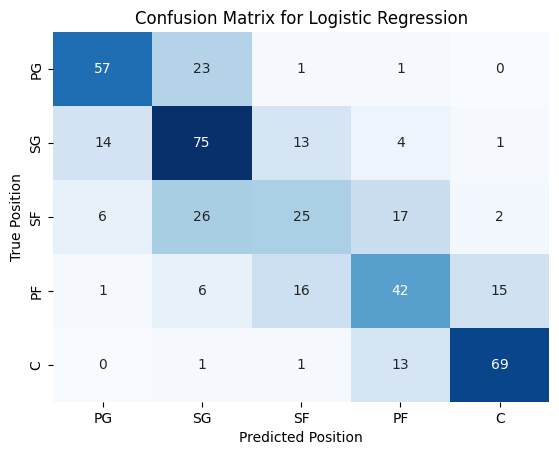

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=position_map.keys(),yticklabels=position_map.keys())
plt.xlabel('Predicted Position')
plt.ylabel('True Position')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [14]:
import numpy as np
coefficients = np.array(model.coef_)
classes = model.classes_

for i in range(len(classes)):
    most_important = np.argmax(np.abs(coefficients[i]))
    print(reverse_positions[classes[i]],"has coefficients of: ",coefficients[i], " with the most important feature being: ", features[most_important])

PG has coefficients of:  [ 2.72435856 -0.45782209 -2.48775239  0.87843893 -0.40885259 -0.51170882
 -0.40942713 -0.16566922 -0.29889005]  with the most important feature being:  AST
SG has coefficients of:  [ 0.04474228 -0.85404442 -1.7839256   0.85961563 -0.07533974 -0.2595788
  1.00349517  0.38467895 -0.25606265]  with the most important feature being:  TRB
SF has coefficients of:  [-0.87518648 -0.31199754  0.31259532  0.44223071 -0.18745114 -0.26562621
  0.75764077 -0.12044673 -0.06927198]  with the most important feature being:  AST
PF has coefficients of:  [-1.08326486  0.37055695  1.45147716 -0.38193905  0.26527358 -0.02875113
 -0.0681321   0.06752874  0.45623437]  with the most important feature being:  TRB
C has coefficients of:  [-0.81064951  1.2533071   2.50760552 -1.79834621  0.40636989  1.06566496
 -1.28357671 -0.16609174  0.16799031]  with the most important feature being:  TRB


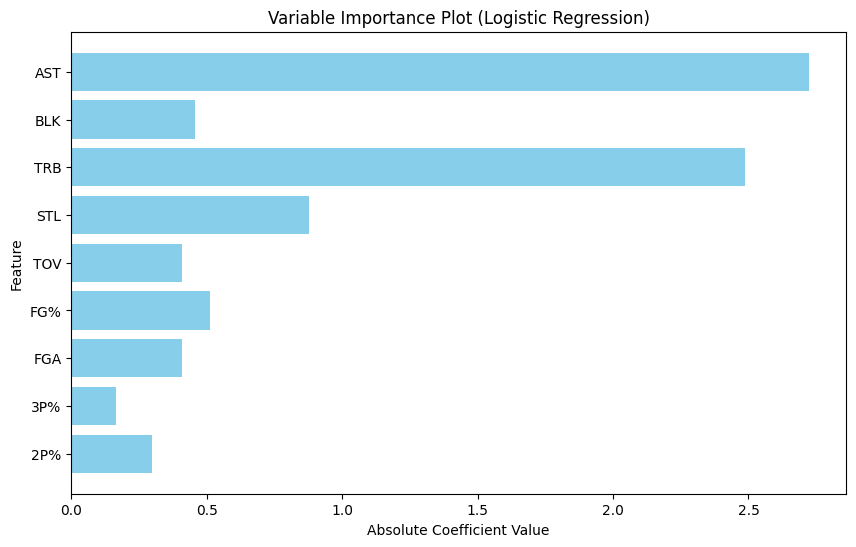

In [15]:
import numpy as np
import matplotlib.pyplot as plt


absolute_coefficients = np.abs(model.coef_[0])

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(features)), absolute_coefficients, color='skyblue')
plt.yticks(np.arange(len(features)), features)  
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Variable Importance Plot (Logistic Regression)')
plt.gca().invert_yaxis()  
plt.show()


In [16]:
pred = model.predict([[1,0.1,6,2,3,0.3,2,0.5,0.5]])
key = next(key for key, value in position_map.items() if value == pred)
print(key)

PF


In [17]:
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_pred, y_test)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.7674418604651163
